In this notebook we are going to see the results without harmonisation

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from os.path import join as opj
from scipy.spatial.distance import squareform, pdist
from scipy.io import savemat, loadmat
import pickle

In [17]:
Y = np.load('../data/data_after_combat.npz')['Y']
Y_combat = np.load('../data/data_after_combat.npz')['Y_combat']
group = np.load('../data/data_after_combat.npz')['group']

In [125]:
list(np.load('../data/data_after_combat.npz').keys())

['subjects', 'age', 'sex', 'site', 'group', 'Y', 'Y_combat', 'CC_adjust']

In [8]:
np.corrcoef(Y.flat, Y_combat.flat)[0,1]

0.9524071457045249

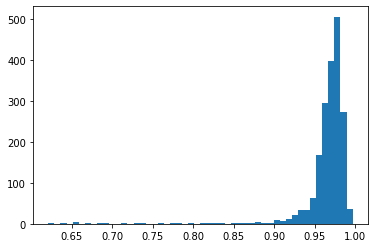

In [15]:
plt.hist([np.corrcoef(Y[ii, :], Y_combat[ii, :])[0,1] for ii in range(Y.shape[0])], bins=50)
pass

In [30]:
n_rois = 86
CC_asd_no_harm = np.array([squareform(Y[group==1][ii, :]) + np.identity(n_rois) for ii in range(sum(group==1))])

In [31]:
savemat('../data/cors_no_harm.mat', {'CC_no_harm': CC_asd_no_harm})

In [32]:
data_dir = "/home/javier/Documentos/amaia-abide/data/"
plot_dir = "/home/javier/Documentos/amaia-abide/plots"

In [207]:
demo_data = pd.read_csv(opj(data_dir, "abide_I_II_demo_clean.csv"))


In [44]:

cons_res_harm = loadmat('../data/results_clustering_both.mat', 
                            struct_as_record=False, 
                            squeeze_me=True)['res_cluster_pearson']

cons_res_no_harm = loadmat('../data/results_clustering_no_harm.mat', 
                            struct_as_record=False, 
                            squeeze_me=True)['res_cluster_pearson']

In [43]:
np.unique(cons_res.S, return_counts=True)

(array([1, 2, 3, 4, 5], dtype=uint8), array([170, 218, 482,   9,   1]))

In [47]:
np.where(cons_res_no_harm.S==1)

(array([  0,   6,  10,  28,  47, 103, 105, 106, 110, 115, 116, 121, 123,
        124, 125, 127, 128, 131, 132, 136, 139, 141, 142, 143, 144, 147,
        149, 153, 154, 159, 160, 161, 162, 167, 170, 171, 173, 179, 180,
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
        196, 197, 198, 199, 200, 201, 202, 203, 220, 252, 272, 273, 274,
        275, 304, 308, 343, 345, 349, 361, 362, 365, 368, 370, 372, 373,
        405, 430, 456, 457, 458, 459, 462, 463, 464, 465, 467, 469, 470,
        471, 472, 473, 474, 475, 476, 478, 479, 480, 481, 488, 491, 494,
        527, 533, 547, 550, 555, 572, 577, 584, 588, 589, 660, 665, 666,
        667, 668, 670, 671, 672, 673, 679, 680, 681, 686, 692, 694, 695,
        701, 702, 703, 704, 705, 706, 707, 709, 710, 712, 713, 714, 715,
        716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728,
        729, 731, 732, 733, 734, 741, 751, 756, 777, 781, 794, 833, 834,
        875]),)

In [52]:
len(set(list(np.where(cons_res_harm.S==1)[0])) & set(list(np.where(cons_res_no_harm.S==1)[0])))

102

In [53]:
len(set(list(np.where(cons_res_harm.S==2)[0])) & set(list(np.where(cons_res_no_harm.S==2)[0])))

195

In [54]:
len(set(list(np.where(cons_res_harm.S==3)[0])) & set(list(np.where(cons_res_no_harm.S==3)[0])))

426

In [57]:
# Read ASD subjects

f = open(opj(data_dir, "subjects_subgroups.pkl"), "rb")
subjects_subgroups = pickle.load(f, encoding='utf-8')
f.close()

asd_subjects = subjects_subgroups['asd_subjs']
td_subjects = subjects_subgroups['tc_subjs']

In [58]:
subjects = np.concatenate((td_subjects, asd_subjects))

In [63]:
age_asd = pd.merge(pd.DataFrame({"SUB_ID":asd_subjects}), demo_data, on=["SUB_ID"]).AGE_AT_SCAN

In [79]:
[print(age_asd[cons_res_no_harm.S==ii+1].dropna().mean()) for ii in range(3)]
pass

12.910366712752944
18.054187210779816
16.41272611292737


In [80]:
[print(age_asd[cons_res_harm.S==ii+1].dropna().mean()) for ii in range(3)]
pass

14.936236429933889
16.29394330733452
16.211499374747834


In [67]:
age_asd[cons_res_no_harm.S==2].mean()

18.054187210779816

In [91]:
from scipy.stats import f_oneway, kruskal
print(f_oneway(*[age_asd[cons_res_no_harm.S==1],age_asd[cons_res_no_harm.S==2], age_asd[cons_res_no_harm.S==3]]))
print(f_oneway(*[age_asd[cons_res_harm.S==1],age_asd[cons_res_harm.S==2], age_asd[cons_res_harm.S==3]]))

F_onewayResult(statistic=15.932507169243921, pvalue=1.602222848450456e-07)
F_onewayResult(statistic=1.0933734201269356, pvalue=0.3355495323887677)


In [88]:
viq = pd.merge(pd.DataFrame({"SUB_ID":asd_subjects}), demo_data, on=["SUB_ID"]).VIQ
fiq = pd.merge(pd.DataFrame({"SUB_ID":asd_subjects}), demo_data, on=["SUB_ID"]).FIQ
piq = pd.merge(pd.DataFrame({"SUB_ID":asd_subjects}), demo_data, on=["SUB_ID"]).PIQ

In [89]:
print(f_oneway(*[viq[cons_res_no_harm.S==(ii+1)].dropna() for ii in range(3)]))
print(f_oneway(*[fiq[cons_res_no_harm.S==(ii+1)].dropna() for ii in range(3)]))
print(f_oneway(*[piq[cons_res_no_harm.S==(ii+1)].dropna() for ii in range(3)]))

F_onewayResult(statistic=0.07078949761354791, pvalue=0.9316646850851478)
F_onewayResult(statistic=0.027390303504665103, pvalue=0.9729823149654404)
F_onewayResult(statistic=0.13080694692573847, pvalue=0.8774082203819756)


In [94]:
float_columns = demo_data.select_dtypes(float).columns

p_columns=[]
for column in float_columns:
    temp = pd.merge(pd.DataFrame({"SUB_ID":asd_subjects}), demo_data, on=["SUB_ID"]).loc[:, column]
    
    f, p = kruskal(*[temp.loc[cons_res_no_harm.S==(ii+1)].dropna() for ii in range(3)])
    print(" kruskal-wallis of %s across modules = %.5f" %(column, p))

 kruskal-wallis of AGE_AT_SCAN across modules = 0.00000
 kruskal-wallis of DSM_IV_TR across modules = 0.02142
 kruskal-wallis of FIQ across modules = 0.84099
 kruskal-wallis of VIQ across modules = 0.69811
 kruskal-wallis of PIQ across modules = 0.73058
 kruskal-wallis of ADI_R_SOCIAL_TOTAL_A across modules = 0.31577
 kruskal-wallis of ADI_R_VERBAL_TOTAL_BV across modules = 0.26046


In [147]:
from joblib import Parallel, delayed

In [227]:
def gower(D): 
    # Convert distance object to matrix form
    #D = as.matrix(D)

    # Dimensionality of distance matrix
    n = int(D.shape[0])

    # Create Gower's symmetry matrix (Gower, 1966)
    A = -0.5*np.square(D)

    # Subtract column means As = (I - 1/n * 11")A
    As = A - np.outer(np.ones(n),  A.mean(0))
    #Substract row
    G = As - np.outer(As.mean(1), np.ones(n))

    return G

def hat_matrix(X):
    """
    Calculates distance-based hat matrix for an NxM matrix of M predictors from
    N variables. Adds the intercept term for you.
    """
    n = X.shape[0]
    
    
    X = np.column_stack((np.ones(n), X)) # add intercept
    
    XXT = np.matmul(X.T, X)
    XXT_inv = np.linalg.inv(XXT)
    
    H = np.matmul(np.matmul(X, XXT_inv), X.T)

    return H

def compute_SSB(H, G, df1):
    trace_HG = np.trace(np.matmul(H, G))
    return trace_HG/df1
    
def compute_SSW(H, G, df2):
    trace_HG = np.trace(np.matmul(H, G))
    trace_G  = np.trace(G)

    return (trace_G - trace_HG )/df2

def design_matrices(df):
    
    X_list = []
    for ii in  range(df.shape[1]):
        #TODO: category gives error
        if (df.iloc[:, ii].dtype=='object'):
            X_list.append(pd.get_dummies(df.iloc[:, ii], 
                                         drop_first=True).values)
        else:
            X_list.append(df.iloc[:, ii].values[:, np.newaxis])
            
    return X_list

def mdmr(X, D, n_perm=100):
    H = hat_matrix(X)
    
    #omnibus effect 
    
    # Computational trick: H is idempotent, so H = HH. tr(ABC) = tr(CAB), so
    # tr(HGH) = tr(HHG) = tr(HG). Also, tr(AB) = vec(A)"vec(B), so
    trHG = np.matmul(H.flatten().T, G.flatten())

    # Numerical trick: tr((I-H)G(I-H)) = tr(G) - tr(HGH), so
    trG  = np.trace(G)
    
    F = trHG/(trG - trHG )

class MDMR(object):
    
    def __init__(self, n_perms = 100, random_state=None, n_jobs = None):
        self.n_perms = n_perms
        self.random_state = random_state
        self.n_jobs = n_jobs
        
    def fit(self, X_df, D, G=None):
         
        #TODO: Check D symmetrical and convert to numpy
        
        # Compute Gower matrix and its trace for later
        if G is None:
            G = gower(D)
        trG = np.trace(G)
        
        # Check input is a dataframe
        if isinstance(X_df, pd.DataFrame) is False:
            raise AttributeError("Input data must be a dataframe")

        # Extract list of design matrices from the dataframe. This is done
        # to be able to handle categorical features
        X_list = design_matrices(X_df)
    
        # Full model hat matrix
        X_full = np.column_stack(X_list)
        
        # N observations and m features (without intercept)
        N, m = X_full.shape
        
        H_full = hat_matrix(X_full)
        df2 = N - m
        
        den = compute_SSW(H_full, G, df2) 
        
        # Compute SSB for full model (omnibus)
        num_omni = compute_SSB(H_full, G, m)
        
        # Compute F and R2 for omnibus model
        self.F_omni_ = num_omni/den
        self.r2_omni_ = num_omni*m/trG

        # Compute differences between H and defreees of freedom
        H_list = []
        for ii in range(len(X_list)):
            temp = X_list.copy()
            temp.pop(ii)
            if temp:
                H_ii = H_full - hat_matrix(np.column_stack(temp))
            else:
                H_ii = H_full 
            H_list.append(H_ii)
            
        # Compute degrees of freedom
        df1_list = []
        for X in X_list:
            m_ii = X.shape[1]
            df1_list.append(m_ii)
        
        # Compute SSB for each column
        num_x = Parallel(n_jobs=self.n_jobs)(delayed(compute_SSB)(H, G, df1) for \
                                           (H, df1) in zip(H_list, df1_list))            
        num_x = np.array(num_x)
            
        self.F_ = num_x/den
        # pseudo R2.Note that we have to multiply by the degrees of freedom
        self.r2_ = np.multiply(num_x, np.array(df1_list))/trG

       

In [208]:
demo_cluster = pd.merge(pd.DataFrame({"SUB_ID":subjects}), demo_data, on=["SUB_ID"])

In [209]:
demo_cluster.loc[:,'clus_id'] = 0

In [210]:
for ii in cons_res_no_harm.S:    
    demo_cluster.loc[1010 + np.where(cons_res_no_harm.S==ii)[0],'clus_id'] = ii

In [211]:
demo_cluster.clus_id.value_counts()

0    1010
3     482
2     218
1     170
4       9
5       1
Name: clus_id, dtype: int64

In [212]:
vars_interest = ['clus_id', 'AGE_AT_SCAN', 'SEX',  'FIQ', 'VIQ', 'PIQ']

In [213]:
to_take = ~np.any(demo_cluster.loc[:, vars_interest].isna(), axis=1).values

In [214]:
CC_no_harm = np.array([squareform(Y[ii,:]) + np.identity(86) for ii in range(Y.shape[0])])

In [215]:
X_df = demo_cluster.loc[to_take, vars_interest]
YY = CC_no_harm[to_take, :, :]

In [201]:
#np.savez_compressed('../data/mdmr_no_harm.npz', YY = YY, XX = X_df)

In [216]:
X_df.clus_id.value_counts()

0    770
3    359
2    167
1    136
4      8
Name: clus_id, dtype: int64

In [158]:
#X_df['clus_id'] = X_df['clus_id'].astype(str)
#X_df['SEX'] = X_df['SEX'].astype(str)

In [206]:
YY.shape

(1440, 86, 86)

In [228]:
res_F_df = pd.DataFrame({})
for jj in np.arange(1, 4):
    list_Fs = []
    cond = (X_df.clus_id==0) | (X_df.clus_id==jj)
    
    XX = X_df.loc[cond,:]
    
    for ii in range(YY.shape[1]):

            D = squareform(np.sqrt(2*pdist(YY[cond, ii, :], 'correlation')))
            mdmr = MDMR()
            mdmr.fit(XX, D)
            list_Fs.append(mdmr.F_[0])
            
    res_F_df['clus_' + str(jj)] = list_Fs

In [230]:
XX.shape

(1129, 6)

In [236]:
res_F_df

,clus_1,clus_2,clus_3
0,26.692526,9.066575,2.932128
1,9.596232,16.705837,2.463054
2,14.655098,16.880814,9.566029
3,19.747739,5.642910,3.382138
4,9.120115,9.167111,8.863810
...,...,...,...
81,22.827710,5.813969,5.062552
82,26.022973,16.792641,7.561432
83,43.114282,11.550613,7.084193
84,23.404453,9.382862,2.899048


In [237]:
res_F_df.to_csv("../data/mdmr_cluster_stats_no_harm.csv")

In [240]:
res_F_df_harm = pd.read_csv("../data/mdmr_clusters_healthy_stats.csv")

In [250]:
np.corrcoef(res_F_df_harm.iloc[:, 1].values, res_F_df.iloc[:, 0].values)[0,1]

0.9051476462686716

In [252]:
np.corrcoef(res_F_df_harm.iloc[:, 2].values, res_F_df.iloc[:, 1].values)[0,1]

0.9276671097817923

In [254]:
np.corrcoef(res_F_df_harm.iloc[:, 3].values, res_F_df.iloc[:, 2].values)[0,1]

0.9521951430758964